In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/heart.csv')

In [2]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Finding optimal k value...


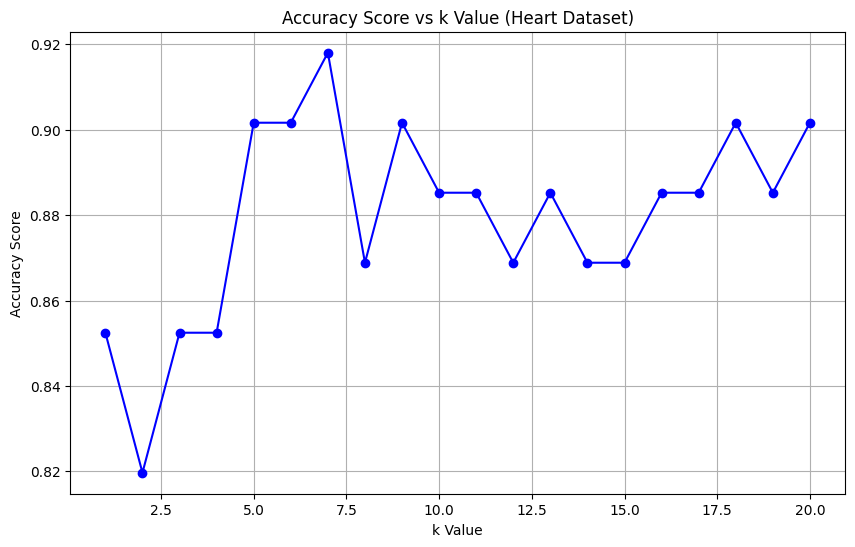

Best k value: 7
Maximum Accuracy Score: 0.9180


In [3]:
# Function to find the best k value
def find_best_k(X_train_scaled, X_test_scaled, y_train, y_test, max_k=20):
    scores = []
    k_values = range(1, max_k+1)

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_scaled, y_train)
        score = knn.score(X_test_scaled, y_test)
        scores.append(score)

    # Plot k values vs accuracy scores
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, scores, marker='o', color='blue')
    plt.xlabel('k Value')
    plt.ylabel('Accuracy Score')
    plt.title('Accuracy Score vs k Value (Heart Dataset)')
    plt.grid(True)
    plt.show()

    best_k = k_values[np.argmax(scores)]
    return best_k, max(scores)

# Find the best k value
print("Finding optimal k value...")
best_k, best_score = find_best_k(X_train_scaled, X_test_scaled, y_train, y_test)
print(f"Best k value: {best_k}")
print(f"Maximum Accuracy Score: {best_score:.4f}")


Accuracy Score with k=7: 0.9180


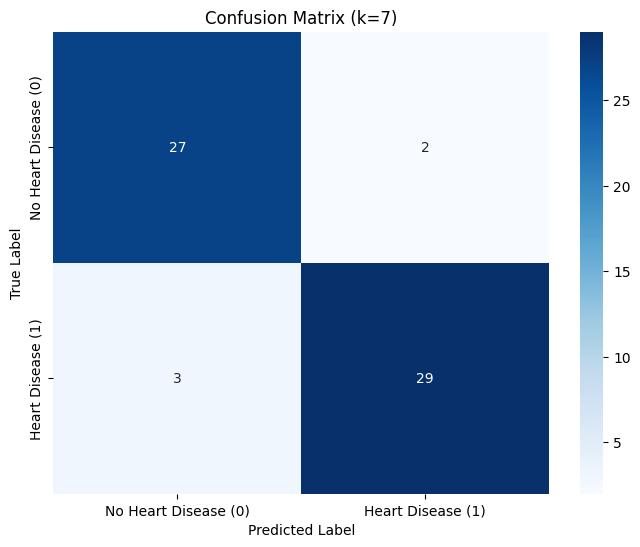

In [5]:
# Train KNN classifier with the best k value
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score with k={best_k}: {accuracy:.4f}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Heart Disease (0)', 'Heart Disease (1)'],
            yticklabels=['No Heart Disease (0)', 'Heart Disease (1)'])
plt.title(f'Confusion Matrix (k={best_k})')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

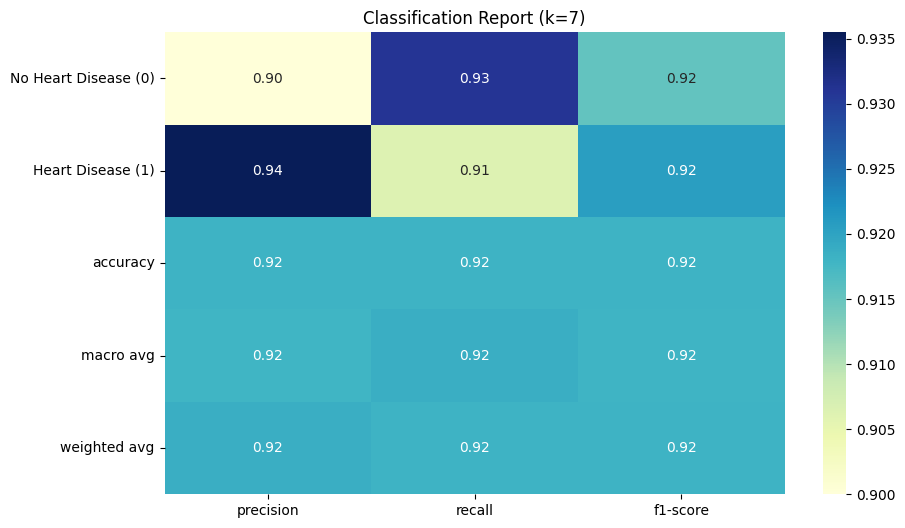


Confusion Matrix Breakdown:
True Negatives (TN): 27
False Positives (FP): 2
False Negatives (FN): 3
True Positives (TP): 29

Classification Report:
                      precision    recall  f1-score   support

No Heart Disease (0)       0.90      0.93      0.92        29
   Heart Disease (1)       0.94      0.91      0.92        32

            accuracy                           0.92        61
           macro avg       0.92      0.92      0.92        61
        weighted avg       0.92      0.92      0.92        61



In [6]:
# Generate and plot classification report
report = classification_report(y_test, y_pred, target_names=['No Heart Disease (0)', 'Heart Disease (1)'], output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot classification report as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:, :-1], annot=True, cmap='YlGnBu', fmt='.2f')  # Exclude 'support' column
plt.title(f'Classification Report (k={best_k})')
plt.show()

# Print detailed results
print("\nConfusion Matrix Breakdown:")
print(f"True Negatives (TN): {cm[0,0]}")
print(f"False Positives (FP): {cm[0,1]}")
print(f"False Negatives (FN): {cm[1,0]}")
print(f"True Positives (TP): {cm[1,1]}")
print(f"\nClassification Report:\n{classification_report(y_test, y_pred, target_names=['No Heart Disease (0)', 'Heart Disease (1)'])}")